In [78]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,precision_score,recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [79]:
df=pd.read_excel("BankNoteAuthentication.xlsx")
df.head()

,variance,skewness,Kurtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [80]:
print("shape of data",df.shape)
print(df.info())

shape of data (1372, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   Kurtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   Target    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


In [81]:
df.isnull().any()

variance    False
skewness    False
Kurtosis    False
entropy     False
Target      False
dtype: bool

In [82]:
df.describe()

,variance,skewness,Kurtosis,entropy,Target
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [83]:
print("Duplicated values",df.duplicated().sum())

Duplicated values 24


In [84]:
df.drop_duplicates(inplace=True)

In [85]:
print("Correlation")
print(df.corr()["Target"].sort_values(ascending=False))

Correlation
Target      1.000000
Kurtosis    0.154376
entropy    -0.033979
skewness   -0.449835
variance   -0.735185
Name: Target, dtype: float64


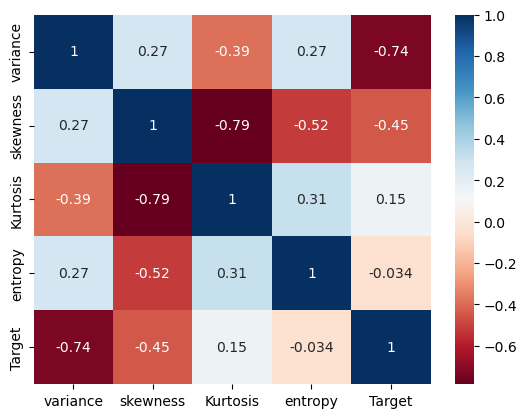

In [86]:
sns.heatmap(df.corr(),annot=True,cmap="RdBu")
plt.show()

### Data Visualization

In [87]:
Authenticated=df[df["Target"]==1]["Target"].count()
Unauthenticated=df[df["Target"]==0]["Target"].count()
print("Number of Authenicated",Authenticated)
print("Number of Unauthenicated",Unauthenticated)

Number of Authenicated 610
Number of Unauthenicated 738


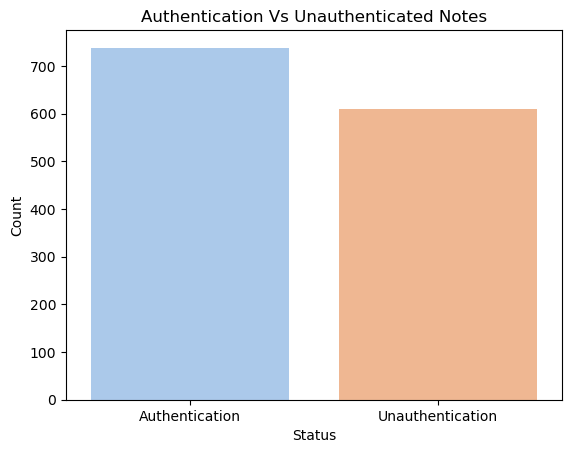

In [88]:
sns.countplot(x="Target",data=df,palette="pastel")
plt.title("Authentication Vs Unauthenticated Notes")
plt.ylabel("Count")
plt.xlabel("Status")
plt.xticks(ticks=[0,1],labels=["Authentication","Unauthentication"])
plt.show()

array([[<Axes: title={'center': 'variance'}>,
        <Axes: title={'center': 'skewness'}>,
        <Axes: title={'center': 'Kurtosis'}>],
       [<Axes: title={'center': 'entropy'}>,
        <Axes: title={'center': 'Target'}>, <Axes: >]], dtype=object)

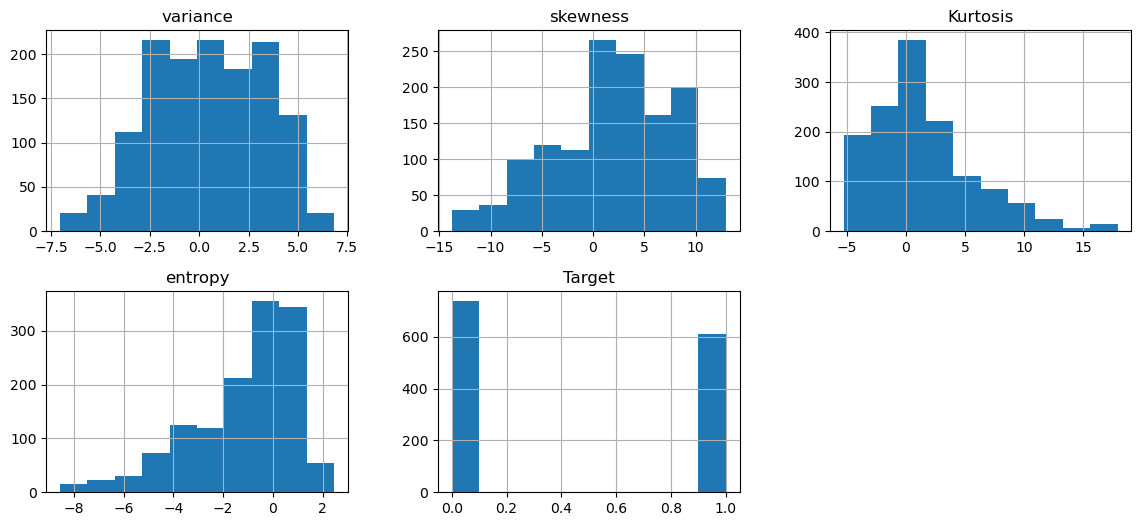

In [89]:
df.hist(figsize=(14,6),layout=(2,3))

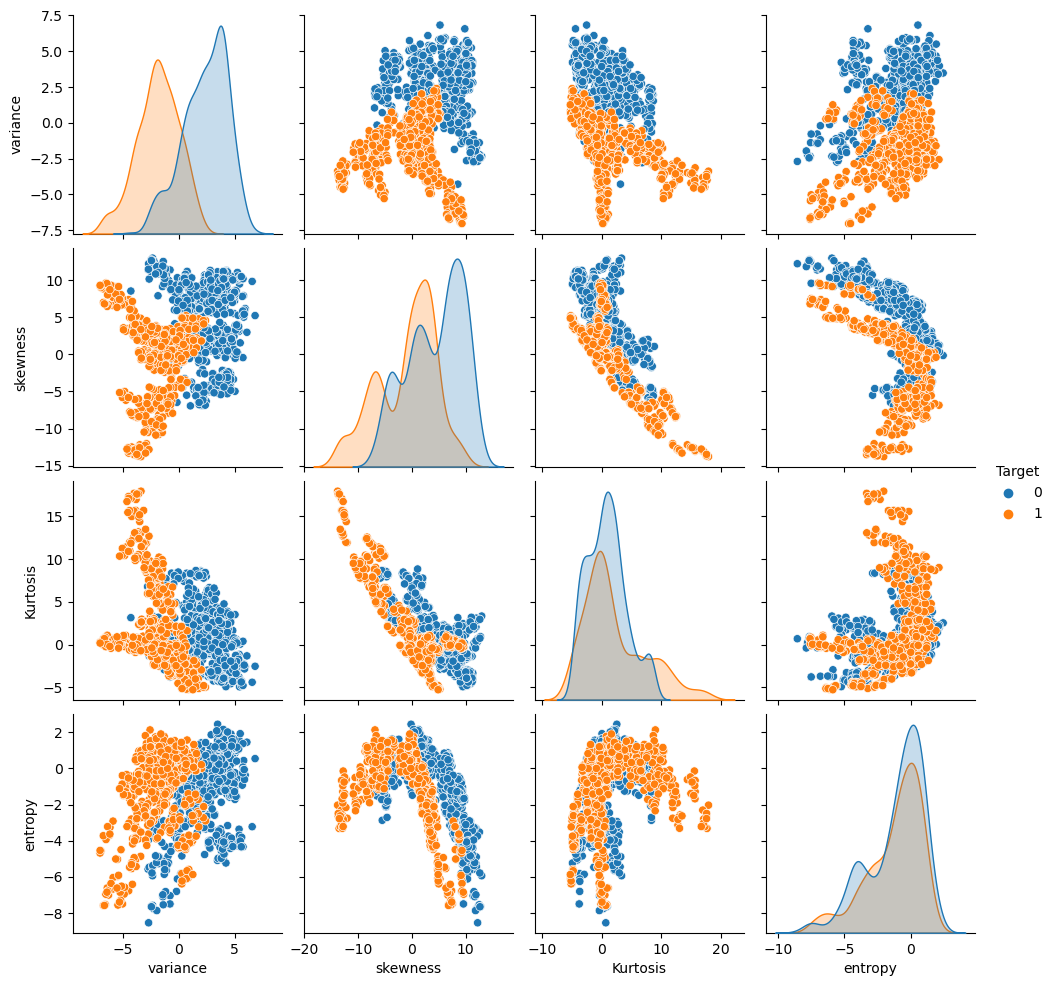

In [90]:
sns.pairplot(data=df,hue='Target')

In [91]:
x=df.drop("Target",axis=1)
y=df["Target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print("shape of train data",(x_train.shape,y_train.shape))
print("shape of test data",(x_test.shape,y_test.shape))

shape of train data ((1011, 4), (1011,))
shape of test data ((337, 4), (337,))


# KNN

In [92]:
Error=[]
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train, y_train)
    pred_i = KNN.predict(x_test)
    Error.append(np.mean(pred_i != y_test))

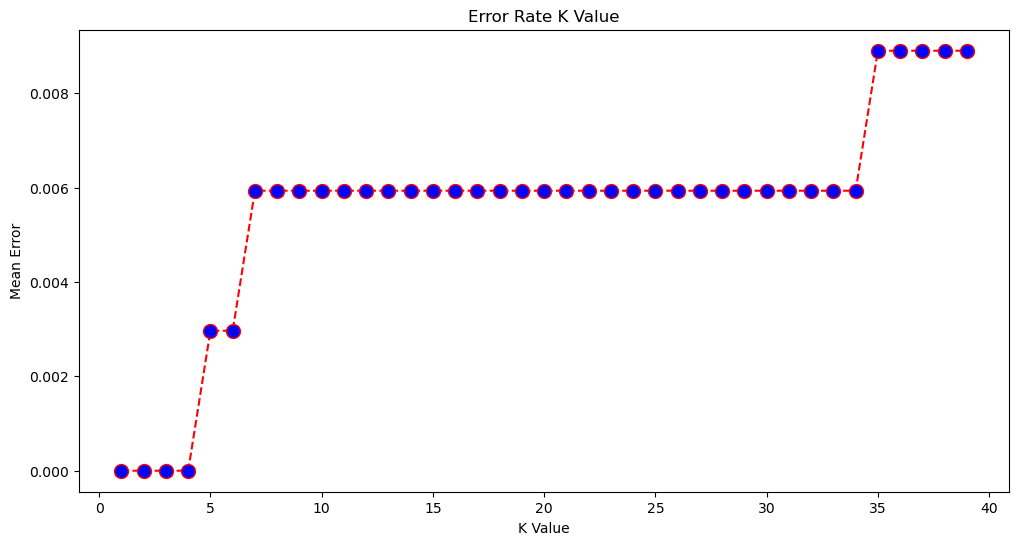

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), Error, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [94]:
KNN=KNeighborsClassifier(n_neighbors=5)

In [95]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [96]:
y_pred=KNN.predict(x_test)

In [105]:
print("classification report:")
print(classification_report(y_test,y_pred))
A1=accuracy_score(y_test,y_pred)*100
print("Accuray:",A1)

classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       185
           1       0.99      1.00      1.00       152

    accuracy                           1.00       337
   macro avg       1.00      1.00      1.00       337
weighted avg       1.00      1.00      1.00       337

Accuray: 99.70326409495549


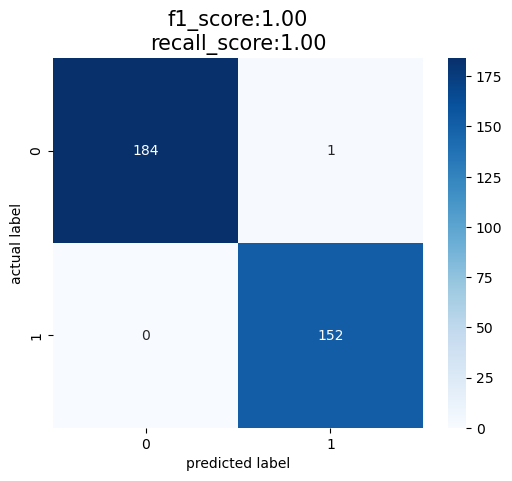

In [118]:
F1=f1_score(y_test,y_pred,average="micro")
R1=recall_score(y_test,y_pred)
C1=confusion_matrix(y_test,y_pred)
sns.heatmap(C1,annot=True,fmt=".0f",square=True,cmap="Blues",color="#cd1076")
plt.title(f"f1_score:{F1:.2f}\n"
         f"recall_score:{R1:.2f}",size=15,color="black")
plt.ylabel("actual label")
plt.xlabel("predicted label")
plt.show()

# Navie

In [107]:
GNB=GaussianNB()

In [108]:
GNB.fit(x_train,y_train)

GaussianNB()

In [109]:
Y_pred=GNB.predict(x_test)
print("Classication Report")
print(classification_report(y_test,Y_pred))
A2=accuracy_score(y_test,Y_pred)*100
print("Accuracy:",A2)

Classication Report
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       185
           1       0.88      0.86      0.87       152

    accuracy                           0.88       337
   macro avg       0.88      0.88      0.88       337
weighted avg       0.88      0.88      0.88       337

Accuracy: 88.4272997032641


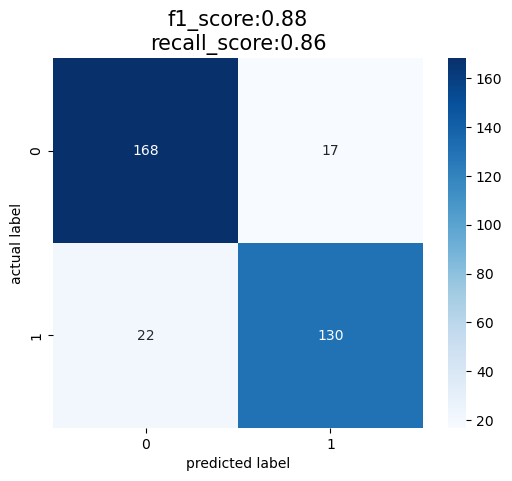

In [120]:
F2=f1_score(y_test,Y_pred,average="micro")
R2=recall_score(y_test,Y_pred)
C2=confusion_matrix(y_test,Y_pred)
sns.heatmap(C2,annot=True,fmt=".0f",square=True,cmap="Blues",color="#cd1076")
plt.title(f"f1_score:{F2:.2f}\n"
         f"recall_score:{R2:.2f}",size=15,color="black")
plt.ylabel("actual label")
plt.xlabel("predicted label")
plt.show()

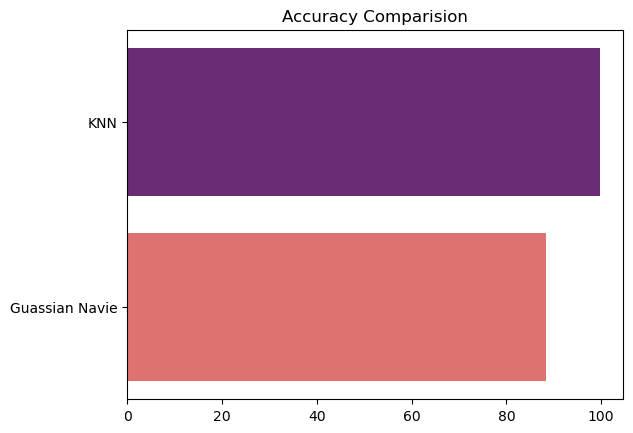

In [117]:
model=["KNN","Guassian Navie"]
Accuracy=[A1,A2]
sns.barplot(y=model,x=Accuracy,palette="magma",orient="h")
plt.title("Accuracy Comparision")
plt.show()

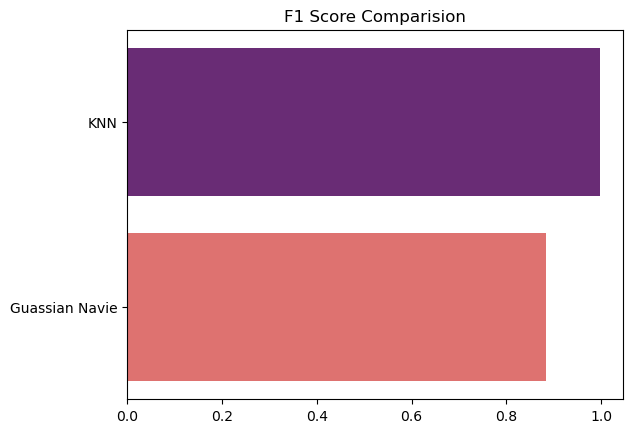

In [121]:
sns.barplot(x=[F1,F2],y=model,palette="magma",orient="h")
plt.title("F1 Score Comparision")
plt.show()